# Heart Disease Prediction


## Problem Description
The goal of this project is to predict the presence of heart disease in a patient.

In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset - Heart.csv
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### The features in the dataset and meaning:

- age - age in years,
- sex - (1 = male; 0 = female),
- cp - chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic),
- trestbps - resting blood pressure (in mm Hg on admission to the hospital),
- chol - serum cholestoral in mg/dl,
- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false),
- restecg - resting electrocardiographic results,
- thalach - maximum heart rate achieved,
- exang - exercise induced angina (1 = yes; 0 = no),
- oldpeak - ST depression induced by exercise relative to rest,
- slope - the slope of the peak exercise ST segment,
- ca - number of major vessels (0-3) colored by flourosopy,
- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect,
- target - have disease or not (1=yes, 0=no).


In [4]:
# rename columns
df.columns =["age", "sex", "chest_pain", "resting_blood_pressure", "cholestrol", "fasting_blood_sugar", "rest_ecg", "max_heart_rate",
             "exercise_induced_agina", "st_depression", "st_slope", "no_major_vassels", "thalassemia", "target"
]
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_agina,st_depression,st_slope,no_major_vassels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Statistical Analysis
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_agina,st_depression,st_slope,no_major_vassels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age                       0
sex                       0
chest_pain                0
resting_blood_pressure    0
cholestrol                0
fasting_blood_sugar       0
rest_ecg                  0
max_heart_rate            0
exercise_induced_agina    0
st_depression             0
st_slope                  0
no_major_vassels          0
thalassemia               0
target                    0
dtype: int64

<AxesSubplot:title={'center':'Visualization of missing values'}>

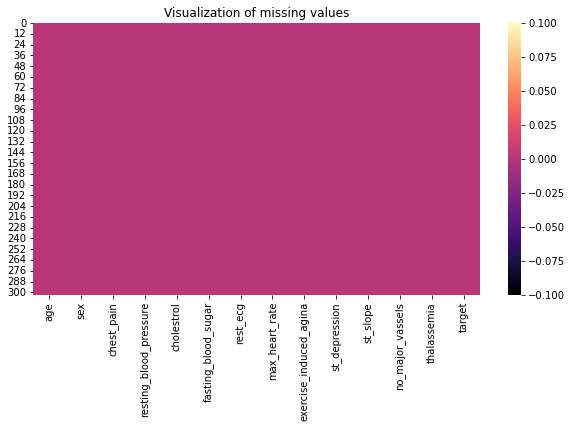

In [7]:
# visualize the missing values
plt.figure(figsize=(10,5))
plt.title('Visualization of missing values')
sns.heatmap(df.isnull(), cbar=True, cmap='magma')

### Exploratory Data Analysis

In [8]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_agina,st_depression,st_slope,no_major_vassels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0, 0.5, 'Count of age Group')

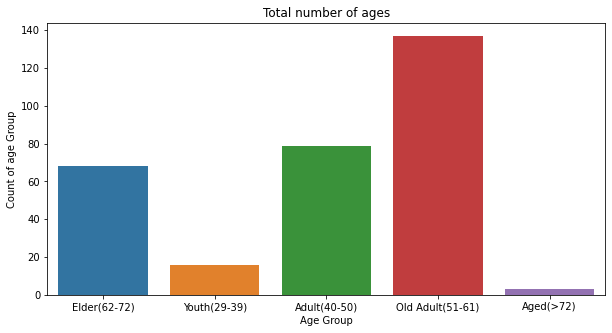

In [9]:
# Age
def age_bracket(age):
    if age <= 39:
        return 'Youth(29-39)'
    elif age <=50:
        return 'Adult(40-50)'
    elif age <= 61:
        return 'Old Adult(51-61)'
    elif age <=72:
        return 'Elder(62-72)'
    else:
        return 'Aged(>72)'
    
#recreate a new column for age category
df['age_group'] = df['age'].apply(age_bracket)


# visualize patient age group
plt.figure(figsize=(10,5))
sns.countplot(x='age_group', data=df)
plt.title('Total number of ages')
plt.xlabel('Age Group')
plt.ylabel('Count of age Group')

In [10]:
df.dtypes

age                         int64
sex                         int64
chest_pain                  int64
resting_blood_pressure      int64
cholestrol                  int64
fasting_blood_sugar         int64
rest_ecg                    int64
max_heart_rate              int64
exercise_induced_agina      int64
st_depression             float64
st_slope                    int64
no_major_vassels            int64
thalassemia                 int64
target                      int64
age_group                  object
dtype: object

In [11]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestrol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_agina,st_depression,st_slope,no_major_vassels,thalassemia,target,age_group
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Elder(62-72)
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Youth(29-39)
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(40-50)
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(51-61)
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(51-61)


Text(0, 0.5, 'Count of patient gender')

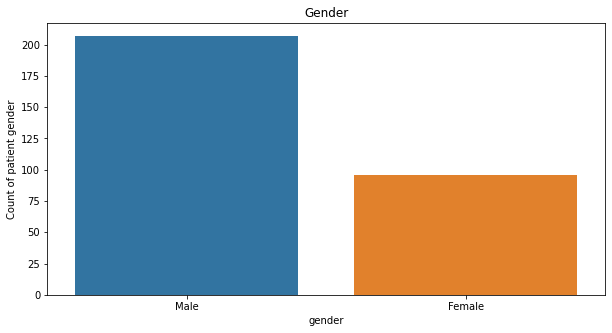

In [12]:
# Sex (1-male, 0-female)
#create a function that categorizes gender

def gender(sex):
    if sex ==1:
        return 'Male'
    else:
        return 'Female'
    
df['gender'] = df['sex'].apply(gender)

# visualize patient gender group
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.title('Gender')
plt.ylabel('Count of patient gender')

Text(0, 0.5, 'Count of age Group')

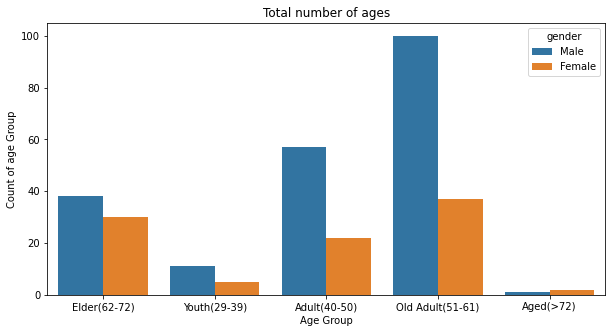

In [13]:
# Visualize age bracket and gender

plt.figure(figsize=(10,5))
sns.countplot(x='age_group', data=df, hue='gender')
plt.title('Total number of ages')
plt.xlabel('Age Group')
plt.ylabel('Count of age Group')

Text(0, 0.5, 'Count of chest pain')

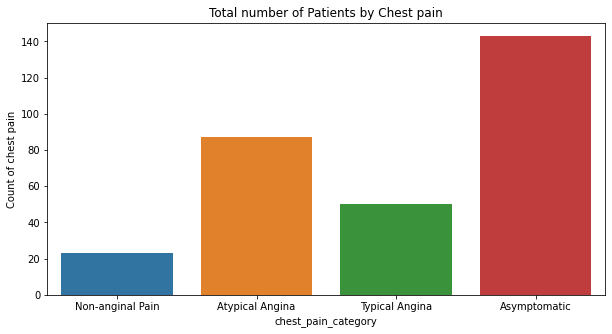

In [14]:
# chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
# create a function to convert from numerical to categorical

def pain_category(cp):
    if cp == 1:
        return 'Typical Angina'
    elif cp == 2:
        return 'Atypical Angina'
    elif cp == 3:
        return 'Non-anginal Pain'
    else:
        return 'Asymptomatic'

    
df['chest_pain_category'] = df['chest_pain'].apply(pain_category)

# visualize patient chest pain category
plt.figure(figsize=(10,5))
sns.countplot(x='chest_pain_category', data=df)
plt.title('Total number of Patients by Chest pain')
plt.ylabel('Count of chest pain')

Text(0, 0.5, 'Count of chest pain')

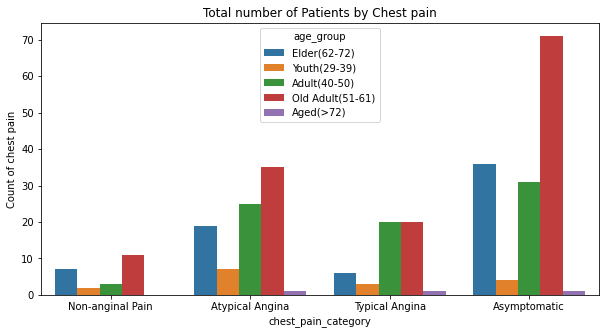

In [15]:
# Visualize chest pain by gender

plt.figure(figsize=(10,5))
sns.countplot(x='chest_pain_category', data=df, hue='age_group')
plt.title('Total number of Patients by Chest pain')
plt.ylabel('Count of chest pain')

<AxesSubplot:>

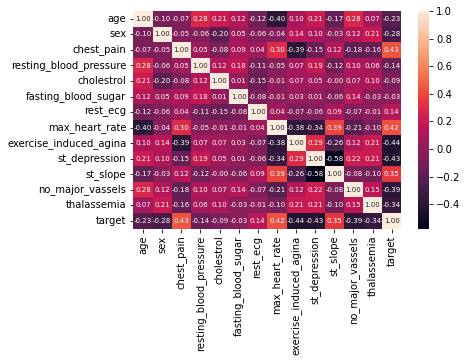

In [16]:
# correlation analysis
corel = df.corr()

sns.heatmap(corel, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 7})

In [17]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#ML Metrics
from sklearn.metrics import accuracy_score

# To disbale warning
import warnings
warnings.filterwarnings('ignore')

In [18]:
X = df[['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_agina', 'st_depression', 'st_slope',
       'no_major_vassels', 'thalassemia']]

y = df[['target']]

In [19]:
#Load three ML algortihms
classifiers = [[RandomForestClassifier(), 'Random Forest'], [KNeighborsClassifier(), 'K-Nearest Neighbor'], [LogisticRegression(), 'Logistic Regression']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracy_score_list = {}

for i in classifiers:
    model = i[0]
    model.fit(X_train, y_train)
    model_name= i[1]
    
    predict = model.predict(X_test)
    
    accuracy = accuracy_score(predict, y_test)
    
    accuracy_score_list[model_name] = ([str(round(accuracy * 100, 2)) + '%'])
    
   # if model_name != classifiers[-1][1]:
    #    print('')
    
   

In [29]:
print("Accuracy Score of ML Algorithms")
as_df = pd.DataFrame(accuracy_score_list)
as_df

Accuracy Score of ML Algorithms


,Random Forest,K-Nearest Neighbor,Logistic Regression
0,78.69%,54.1%,86.89%


### Summary
We can see that Logistic Regression gives us a higher accuracy of 86%. But using the accuracy is not enough to evaluate our model.
Going forward, my goal is to optimize this model, use other evaluation metrics like **precision**, **recall**, **F1-score** to evaluate my model.